In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
T = 288
period = 6

In [23]:
peak_0030 = [np.sin(period/(2*np.pi)*(t+2)) for t in range(T)]
peak_0535 = [np.sin(period/(2*np.pi)*(t+1)) for t in range(T)]
peak_1040 = [np.sin(period/(2*np.pi)*(t+0)) for t in range(T)]
peak_1545 = [np.sin(period/(2*np.pi)*(t-1)) for t in range(T)]
peak_2050 = [np.sin(period/(2*np.pi)*(t-2)) for t in range(T)]
peak_2555 = [np.sin(period/(2*np.pi)*(t-3)) for t in range(T)]

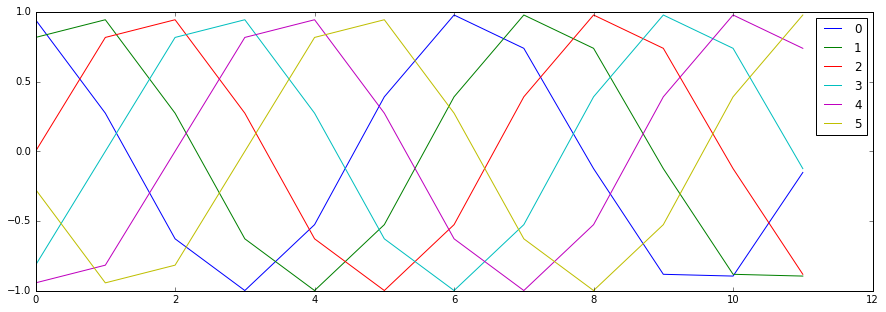

In [28]:
plt.figure(figsize=(15,5))
for i,to_plot in enumerate([peak_0030,peak_0535,peak_1040,peak_1545,peak_2050,peak_2555]):
    plt.plot(to_plot[:12],label=i)
plt.legend()

In [32]:
df = pd.read_csv("../I15S_data2.csv", usecols = ['Date','Time','index','TotalFlow'])
df = df[['Date','Time','index','TotalFlow']]
df = df.sort_values(['Date','Time','index'])


In [33]:
df.shape

(6935530, 4)

In [35]:
pd.pivot?

In [36]:
df.head()

,Date,Time,index,TotalFlow
5734947,2015-01-01,00:00:00,0,28.0
5630158,2015-01-01,00:00:00,1,0.0
5525369,2015-01-01,00:00:00,2,45.0
5420580,2015-01-01,00:00:00,3,25.0
4582268,2015-01-01,00:00:00,4,32.0


In [52]:
df.columns = [u'Date', u'Time', u'StationIndex', u'TotalFlow']

In [54]:
pivoted_df = df.pivot_table(values='TotalFlow', index=['Date','StationIndex'], columns='Time', aggfunc='mean')

In [57]:
pivoted_df=pivoted_df.reset_index()

In [58]:
pivoted_df.head()

Time,Date,StationIndex,00:00:00,00:05:00,00:10:00,00:15:00,00:20:00,00:25:00,00:30:00,00:35:00,...,23:10:00,23:15:00,23:20:00,23:25:00,23:30:00,23:35:00,23:40:00,23:45:00,23:50:00,23:55:00
0,2015-01-01,0,28.0,27.0,40.0,42.0,26.0,50.0,100.0,69.0,...,61.0,61.0,67.0,57.0,50.0,56.0,53.0,58.0,54.0,51.0
1,2015-01-01,1,0.0,5.0,0.0,13.0,8.0,1.0,10.0,7.0,...,13.0,16.0,11.0,12.0,8.0,10.0,14.0,9.0,13.0,17.0
2,2015-01-01,2,45.0,52.0,51.0,56.0,53.0,52.0,54.0,76.0,...,91.0,94.0,80.0,72.0,77.0,67.0,69.0,69.0,57.0,67.0
3,2015-01-01,3,25.0,32.0,30.0,36.0,36.0,38.0,51.0,75.0,...,69.0,66.0,68.0,58.0,61.0,58.0,50.0,56.0,39.0,53.0
4,2015-01-01,4,32.0,21.0,10.0,35.0,34.0,32.0,59.0,37.0,...,74.0,67.0,57.0,55.0,56.0,68.0,59.0,49.0,59.0,34.0


In [65]:
import datetime as dt
def get_day_of_week(my_date):
    return dt.datetime.strptime(my_date, '%Y-%m-%d').strftime('%A')

In [82]:
idx1 = pivoted_df['Date'].apply(lambda x: get_day_of_week(x))=='Wednesday'
new_df = pivoted_df.ix[idx1,:]
del new_df['Date']
#del new_df['Time']

In [91]:
new_df=new_df.groupby('StationIndex').mean()

In [96]:
my_array = new_df.values

In [107]:
my_sines = np.array([peak_0030,peak_0535,peak_1040,peak_1545,peak_2050,peak_2555])

In [112]:
results = np.dot(my_array,my_sines.transpose())

In [118]:
results = np.argmax(results, axis=1)

In [124]:
output = pd.DataFrame({'StationIndex':range(67),'results':results})

In [127]:
output['time_max'] = output['results']*5

In [128]:
output

,StationIndex,results,time_max
0,0,4,20
1,1,2,10
2,2,2,10
3,3,2,10
4,4,2,10
5,5,2,10
6,6,2,10
7,7,2,10
8,8,3,15
9,9,3,15


In [136]:
df2 = pd.read_csv("../I15S_data2.csv", usecols = ['Station','index','Latitude','Longitude'])

In [138]:
df2 = df2.drop_duplicates()

In [140]:
df2.columns = [u'Station', u'Latitude', u'Longitude', u'StationIndex']

In [145]:
df2 = df2.merge(output)

In [147]:
df2.to_csv('peaktimes.csv')